# Revamping the Pricing Strategy for a Car Dealership

### Maximizing Profitability and Customer Satisfaction

A car dealer wants to create a pricing model they can use in their operations. They have provided as a CSV file with car prices and several features to create a model to predict these prices.

The dependent variable is column "selling price" in the file. "Present price" describes the current price of the car if we were going to buy it new. The rest of the columns are self explanatory.
 
I will use regression and data preparation techniques to create the best model for our customer.

### Part 1: Exploratory Data Analysis

In [113]:
#import libraries


import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [114]:
#import dataset
data = pd.read_csv('car_data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Exploratory Data Scrubbing And Exploratory Data Analysis

In [115]:
#Describe Data
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [116]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


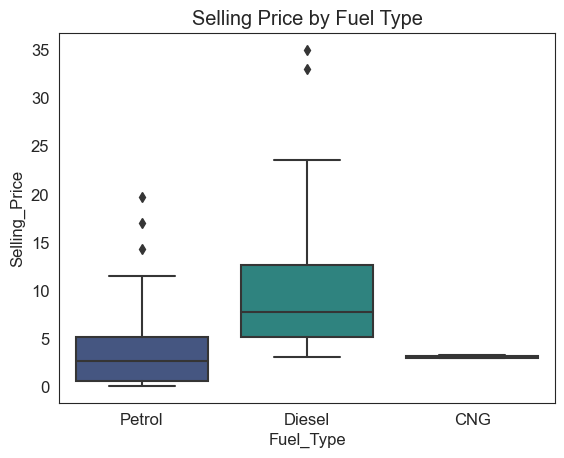

In [117]:
#Plot to find outliers in 'Fuel_Type'

plot = sns.boxplot(x=data['Fuel_Type'], y=data['Selling_Price'], palette="viridis")
plot.axes.set_title("Selling Price by Fuel Type")
sns.set_style("white")

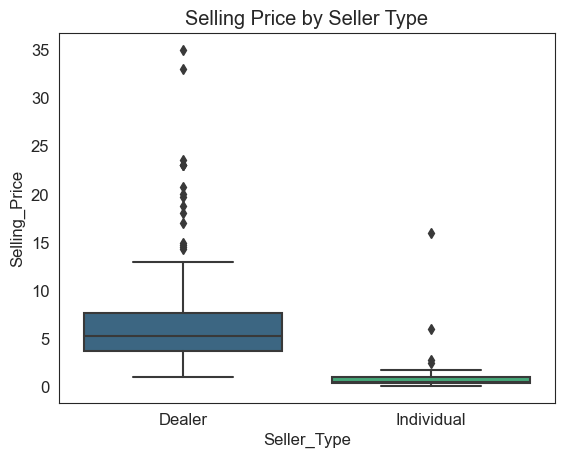

In [118]:
#Plot to find outliers in 'Seller_Type'

plot = sns.boxplot(x=data['Seller_Type'], y=data['Selling_Price'], palette="viridis")
plot.axes.set_title("Selling Price by Seller Type")
sns.set_style("white")

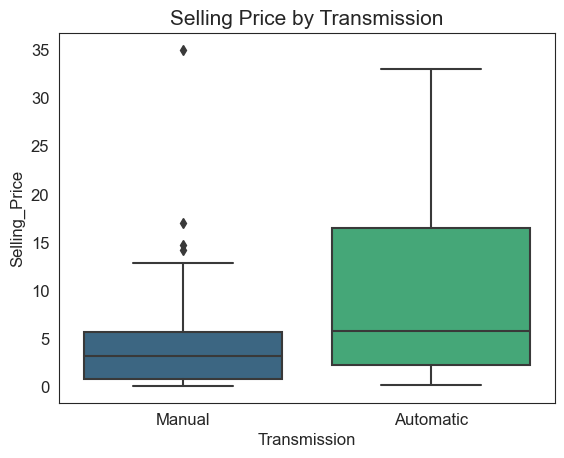

In [119]:
#Plot to find outliers in 'Transmission'

plot = sns.boxplot(x=data['Transmission'], y=data['Selling_Price'], palette="viridis")
plot.axes.set_title("Selling Price by Transmission",fontsize=15)
sns.set_style("white")


C:\Users\akash\AppData\Local\Temp\ipykernel_6328\2839048475.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Selling_Price'], ax=ax, bins=35,palette="viridis")


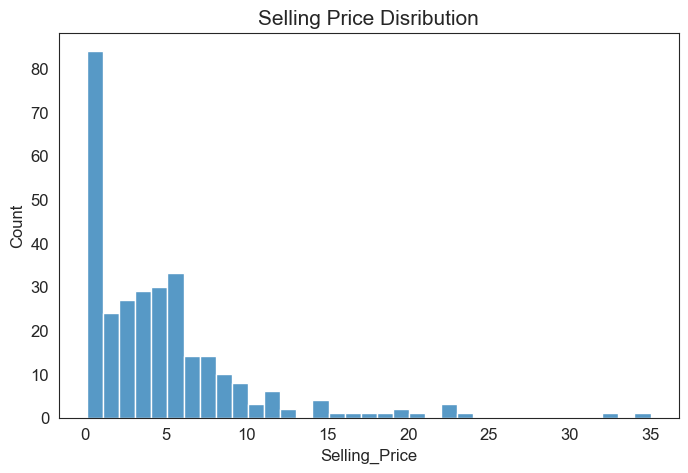

In [120]:
#Plot the distribution of 'Selling_Price'

f, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data['Selling_Price'], ax=ax, bins=35,palette="viridis")
ax.set_title("Selling Price Disribution",fontsize=15)
sns.set_style("white")


After analysing the outliers, we decided that we will only be interested in the data with Selling_Price < 25

In [121]:
#Dealing with Outliers in 'Present Price'
data = data[data['Selling_Price']<25]
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


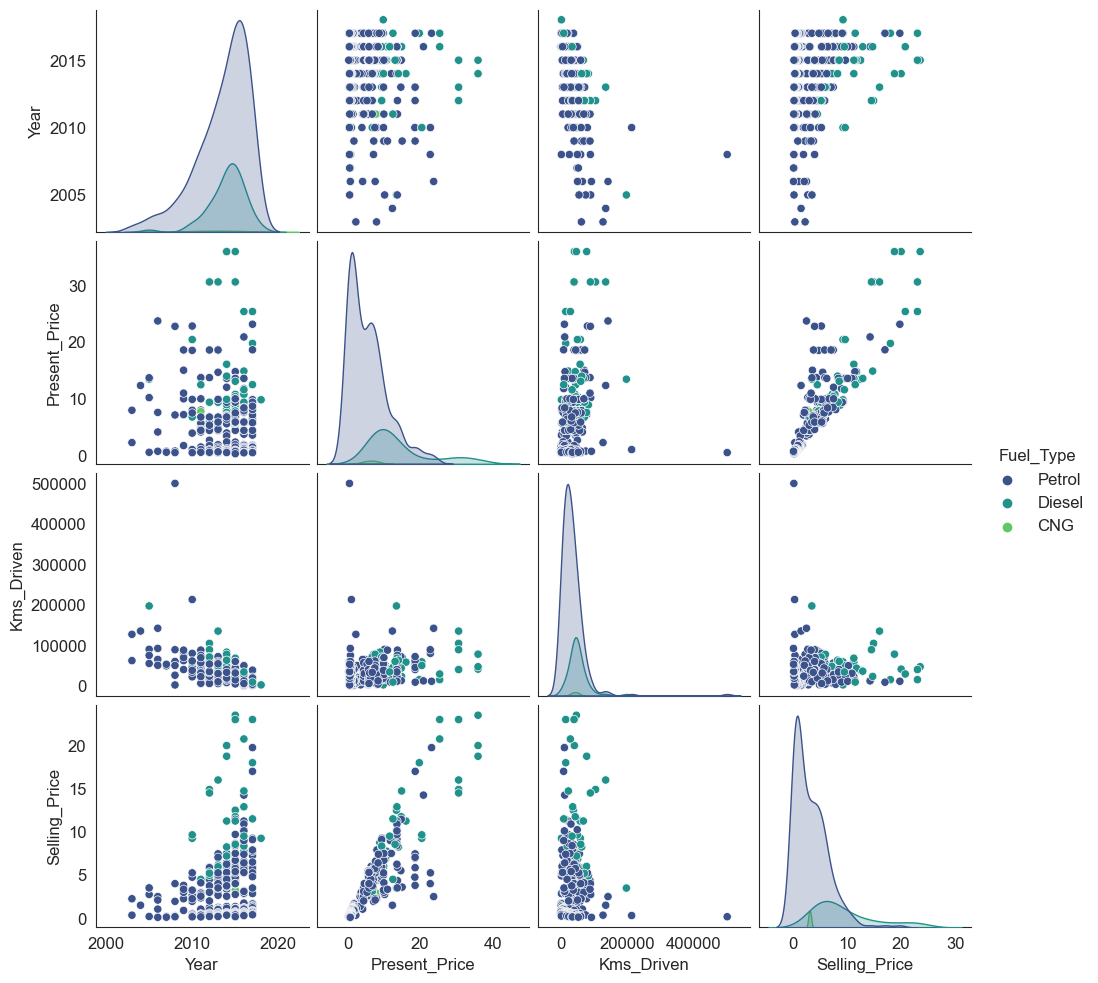

In [122]:
#Visualizing relationships between the features
sns.pairplot(data, vars=['Year', 'Present_Price', 'Kms_Driven', 'Selling_Price'], hue="Fuel_Type", palette='viridis')
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_6328\1822720.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='crest')


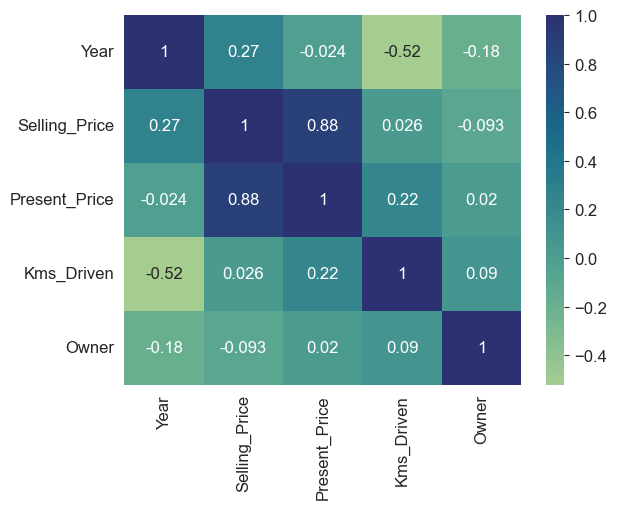

In [123]:
#Finding correlation between the features

sns.heatmap(data.corr(), annot=True, cmap='crest')
plt.show()

In [124]:
#Ecoding Categorical Features
data = pd.get_dummies(data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,1,0,1
298,city,2009,3.35,11.00,87934,0,0,1,0,1
299,city,2017,11.50,12.50,9000,0,1,0,0,1


C:\Users\akash\AppData\Local\Temp\ipykernel_6328\3841852968.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='crest')


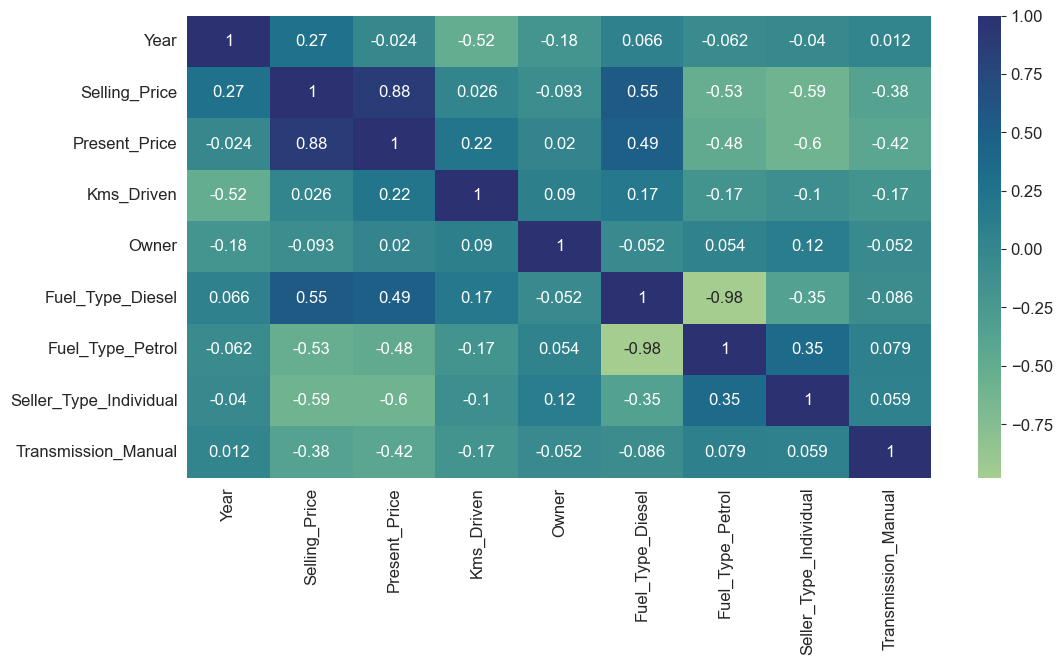

In [125]:
#Finding correlation between the features with Dummies

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='crest')
plt.show()

In [126]:
#Correlation with Selling Price

data.corr()['Selling_Price']

C:\Users\akash\AppData\Local\Temp\ipykernel_6328\768508502.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Selling_Price']


Year                      0.273127
Selling_Price             1.000000
Present_Price             0.880358
Kms_Driven                0.026114
Owner                    -0.092628
Fuel_Type_Diesel          0.546365
Fuel_Type_Petrol         -0.534342
Seller_Type_Individual   -0.593836
Transmission_Manual      -0.375638
Name: Selling_Price, dtype: float64

## EDA conclusions

Based on the correlation coefficients between Selling_Price and the other variables,here are the conclusions and the the features for our linear regression model.

Firstly, we observe that the Selling_Price is strongly correlated with the Present_Price and Year variables. The correlation coefficients for these variables are 0.88 and 0.27, respectively. This suggests that the age of the car and its original price are important factors that determine its selling price.

Secondly, we notice that the type of fuel used by the car is also a significant predictor of its selling price, with a correlation coefficient of 0.55 for Fuel_Type_Diesel and -0.53 for Fuel_Type_Petrol. This indicates that cars running on diesel tend to have a higher selling price compared to those running on petrol.

Thirdly, we find that the type of seller (Individual or Dealer) and the transmission type (Manual or Automatic) are also important features to consider. The correlation coefficient for Seller_Type_Individual is -0.59, indicating that cars sold by individual sellers tend to have a lower selling price than those sold by dealers. The correlation coefficient for Transmission_Manual is -0.38, suggesting that cars with manual transmission are associated with a lower selling price than those with automatic transmission.

In conclusion, based on the correlation coefficients, we can select the following features for our linear regression model: Present_Price, Year, Fuel_Type_Diesel, Fuel_Type_Petrol, Seller_Type_Individual, and Transmission_Manual. These features are likely to have a significant impact on the selling price of a used car.

## Part 2: 

# Model Creation


### Implementing classic linear, lasso, Ridge and ElasticNet regression models

In [127]:
#Selection Features and Tareget Variable based on the EDA conclusions
y = data['Selling_Price']
X = data.drop(['Selling_Price', 'Car_Name', 'Owner', 'Kms_Driven'], axis=1)
X

,Year,Present_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,0,1,0,1
1,2013,9.54,1,0,0,1
2,2017,9.85,0,1,0,1
3,2011,4.15,0,1,0,1
4,2014,6.87,1,0,0,1
...,...,...,...,...,...,...
296,2016,11.60,1,0,0,1
297,2015,5.90,0,1,0,1
298,2009,11.00,0,1,0,1
299,2017,12.50,1,0,0,1


### Models Creation

We will create 4 regression models to see which perform better: Linear Regression, Lasso, Ridge & Elastic Net.

While Linear Regression is a basic method for predicting numerical values, Lasso, Ridge, and ElasticNet are regularization techniques that aim to reduce overfitting by adding a penalty to the regression equation. Lasso and Ridge each have unique penalty functions that determine how much to shrink the coefficients of less important variables towards zero. ElasticNet combines the two methods to benefit from both regularization approaches.

### Train, Test & Split

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X are the independent variables, y the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a scaler object and fit it on the training data
cars_scaler = StandardScaler()

# Scale the training data using the scaler object
X_train_scaled = cars_scaler.fit_transform(X_train)

# Scale the testing data using the same scaler object
X_test_scaled = cars_scaler.transform(X_test)


Getting Alpha

In [129]:
from sklearn.linear_model import RidgeCV

reg = RidgeCV(cv =20).fit(X_train_scaled, y_train)
reg.alpha_

10.0

Creating the models

In [130]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

cars_lr = LinearRegression()
cars_ls = Lasso()
cars_rg = Ridge(alpha=reg.alpha_)
cars_en = ElasticNet()

models = [(cars_lr, 'Linear Regression'),
           (cars_ls, 'Lasso'),
           (cars_rg, "Ridge Regression"),
           (cars_en, "Elastic Net")]

Fitting the models

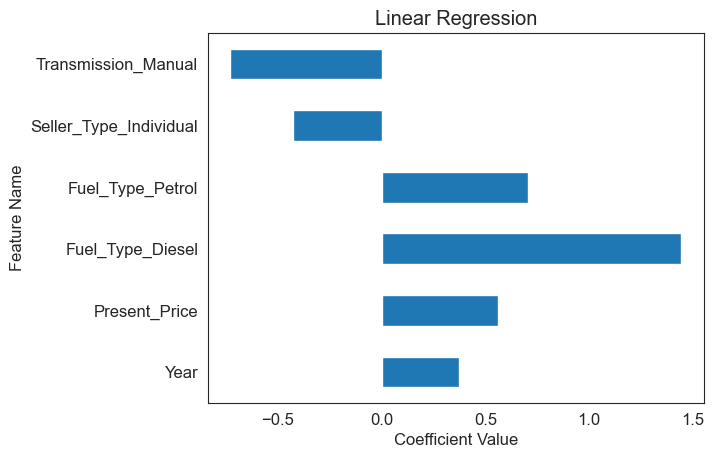

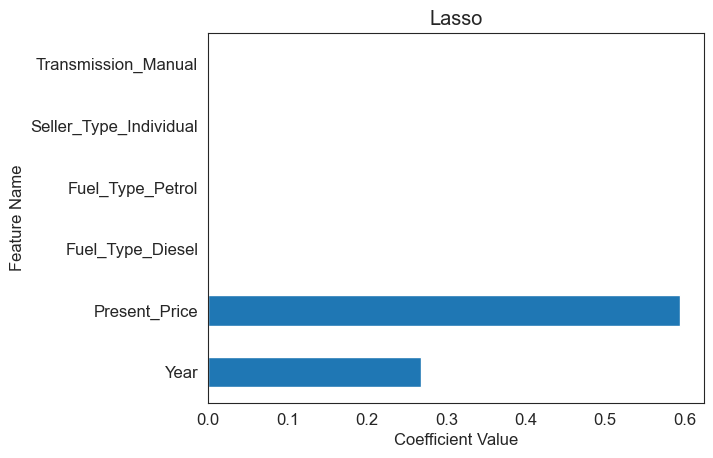

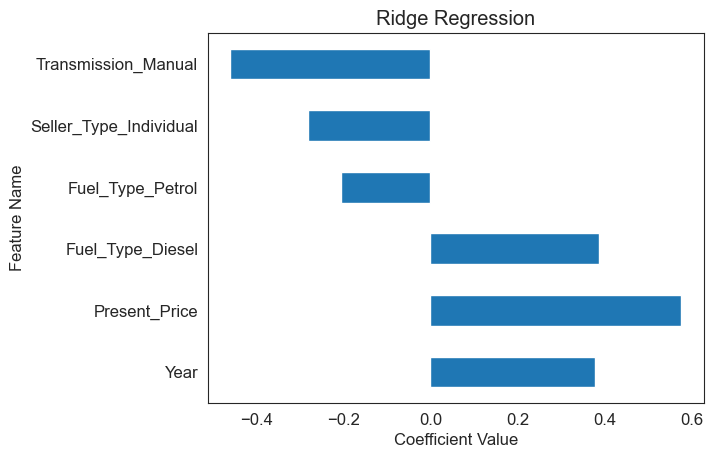

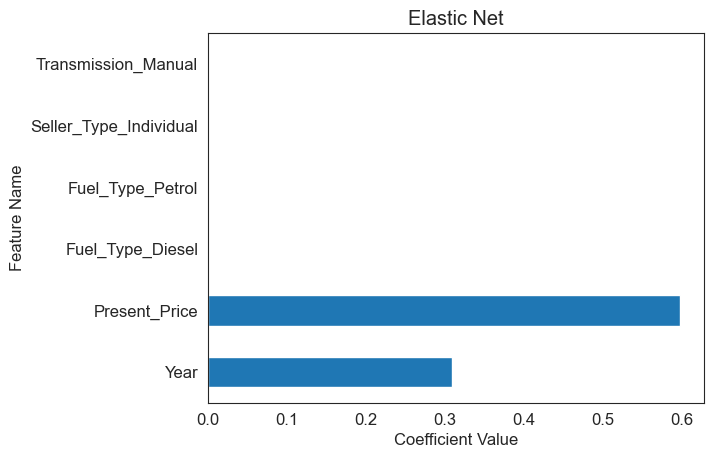

,Feature Name,Linear Regression,Lasso,Ridge Regression,Elastic Net
0,Year,0.375204,0.267639,0.378176,0.309139
1,Present_Price,0.560445,0.594432,0.576336,0.598678
2,Fuel_Type_Diesel,1.445095,0.000000,0.386989,0.000000
3,Fuel_Type_Petrol,0.703616,-0.000000,-0.206408,-0.000000
4,Seller_Type_Individual,-0.424702,-0.000000,-0.280593,-0.000000
5,Transmission_Manual,-0.728548,-0.000000,-0.459544,-0.000000


In [131]:
# Create an empty data frame
df = pd.DataFrame()
df['Feature Name'] = X.columns
for model in models:
    model[0].fit(X_train, y_train)
    pd.Series(model[0].coef_, 
              index=X.columns).plot(kind='barh')
    
    plt.figsize=((10, 10))
    plt.title(model[1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    
    plt.show()
    # Create a column name for that reflects the name of the model
    column_name = model[1]

    # Create a column of coefficient values
    df[column_name] = model[0].coef_

df

The table and graphs show how different regression techniques assign weights to six features. Linear Regression and Ridge Regression give similar weights for all features, while Lasso Regression assigns zero weight to some features indicating that they may not have a significant impact on the target variable. For Lasso the only relevant features are the Present_Price & Year. Elastic Net is a combination of Lasso and Ridge Regression, which assigns lower but non-zero weights to these features.

In [132]:
for model in models:
    model[0].fit(X_train, y_train)
    r2 = r2_score(y_test, model[0].predict(X_test))
    mse = mean_squared_error(y_test, model[0].predict(X_test))
    print(model[1])
    print(f"r2 score of {model[1]}: {r2:.3f}")
    print(f"Mean Squared Error of {model[1]}: {mse:.3f}")
    print("____________________________________________________")

Linear Regression
r2 score of Linear Regression: 0.753
Mean Squared Error of Linear Regression: 5.534
____________________________________________________
Lasso
r2 score of Lasso: 0.698
Mean Squared Error of Lasso: 6.760
____________________________________________________
Ridge Regression
r2 score of Ridge Regression: 0.747
Mean Squared Error of Ridge Regression: 5.660
____________________________________________________
Elastic Net
r2 score of Elastic Net: 0.709
Mean Squared Error of Elastic Net: 6.521
____________________________________________________


### Model with Regularization Selection Conclusion

Based on the results, the best model is Linear Regression, which has the highest r2 score of 0.753 and the lowest mean squared error of 5.534.

A higher r2 score and a lower MSE indicate better performance of a regression model. In this case, the Linear Regression model has the highest r2 score and the lowest MSE, which suggests that it is better at explaining the variation in the dependent variable and making accurate predictions than the other models considered. Therefore, Linear Regression is the best model for predicting the Selling Price in with this data.

However, trying polynomial regressin might generate better results. Let´s try it:


### Implement Polynomial Regression with different degrees

Creating a function for polynomial regression for different degrees

In [133]:
from sklearn.preprocessing import PolynomialFeatures

#Create a function to return the r2 score and RMSE for the train and test data with different degrees 

def create_polynomial_regression_model(degree, verbose = True):
    
    "Creates a polynomial regression model for the given degree"

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train_scaled)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)        

    y_poly_pred = poly_model.predict(X_train_poly)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predict on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test_scaled))

    # evaluate the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluate the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
    
    
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
    
    return (rmse_train, rmse_test, r2_train, r2_test)

In [134]:
#Get the RMSE and r2 score for degrees between 1 and 9 to choose the better performing
errors_train_test = []

for degree in range(10):
    if degree != 0:
        print(f'Degree: {degree}')
        errors_train_test.append(create_polynomial_regression_model(degree))
        print('________________________________________________________________________')
        print('-')
    


Degree: 1
The model performance for the training set
-------------------------------------------
RMSE of training set is 1.398818954086048
R2 score of training set is 0.8996647442078863


The model performance for the test set
-------------------------------------------
RMSE of test set is 2.3525231445848727
R2 score of test set is 0.752988884147026
________________________________________________________________________
-
Degree: 2
The model performance for the training set
-------------------------------------------
RMSE of training set is 0.6509254755391959
R2 score of training set is 0.978273334230654


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.8182933765854293
R2 score of test set is 0.9701140710356139
________________________________________________________________________
-
Degree: 3
The model performance for the training set
-------------------------------------------
RMSE of training set is 0.49821612435908186
R2 s

### Polynomial Regression Analysis Conclusion

It can be concluded that the degree 2 model is performing the best. The R2 score for both the training and test sets are high (0.978 and 0.970 respectively), indicating that the model can explain a significant portion of the variance in the data. Additionally, the RMSE values for both sets are relatively low (0.651 and 0.818 respectively), which indicates that the model's predictions are relatively close to the actual values. Overall, the model appears to have good predictive performance, but it would be important to assess its performance on additional validation sets to ensure that it generalizes well to new data.

# Final Conclusion

Based on the results, we can say that the Polynomial Regression Model with 2 degrees is a better choice for modeling the Selling Price compared to the Linear Regression Model. The Polynomial Regression Model has a higher r2 score and a lower mean squared error, indicating better predictive performance compared to the Linear Regression Model.

# Next Steps

Next steps could include evaluating the models on additional validation sets, testing the models on new data, and comparing their performance in different scenarios to determine which model is more suitable for the specific problem at hand. It is also important to consider other factors such as model interpretability, computational efficiency, and scalability when choosing a model for practical applications.